# Fall Prep Notebook 9
## Classifying Pumpkin Seeds III

This notebook has a few exercises that can serve as a primer for what to expect in the `Fall Problem Session 9` notebook. These exercises will touch upon the basic python, `pandas`, `numpy`, `matplotlib` and some supervised learning basic techniques that you may want a refresher on prior to starting `Fall Problem Session 9`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

#### 1. Making a `DataFrame`

Make a `DataFrame` from the `numpy` arrays `apple`, `banana` and `cherry`. Make the column names of the `DataFrame` the same as the given variable names and make the index the list stored in `index_variable`. Sort the values of the `DataFrame` by the `banana` column.

In [2]:
apple = np.ones(20)
banana = np.random.randn(20)
cherry = np.random.binomial(5, .4, 20)
index_variable = ["row_" + str(i) for i in range(1, 21)]

##### Sample Solution

In [3]:
pd.DataFrame({'apple':apple,
                 'banana':banana,
                 'cherry':cherry},
                index = index_variable).sort_values('banana')

,apple,banana,cherry
row_13,1.0,-2.198037,1
row_2,1.0,-1.670544,2
row_11,1.0,-1.458977,2
row_7,1.0,-1.395792,1
row_19,1.0,-1.095779,2
row_4,1.0,-0.196724,3
row_16,1.0,-0.155528,2
row_14,1.0,-0.100120,2
row_18,1.0,-0.079914,2
row_6,1.0,-0.041941,2


#### 2. Review problem sessions 7 and 8

In `Fall Problem Session 9` we will use what you did in `Fall Problem Session 7` and `Fall Problem Session 8`, review your group's work as well as the complete version.

#### 3. Reading in an excel file

- Read in `Pistachio_16_Features_Dataset.xlsx` from the `Data` folder using `pandas`. 
- Make a column `y` where `y=1` when `Class="Kirmizi_Pistachio"` and `y=0` when `Class="Siit_Pistachio"`
- Do a train test split of the data setting $10\%$ of the data aside for the test set and stratifying on the `Class` column.

##### Sample Solution

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_excel("../../Data/Pistachio_16_Features_Dataset.xlsx")
df['y'] = 1
df.loc[df.Class=="Siit_Pistachio", 'y'] = 0

In [6]:
train, test = train_test_split(df.copy(),
                                  shuffle=True,
                                  random_state=4039,
                                  test_size=.1,
                                  stratify=df.Class)

#### 4. Building a pistachio model

##### a.

Import `PCA`, `StandardScaler`, `Pipeline` and `KNeighborsClassifier`.

##### Sample Solution

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

##### b.

Import what you would need to find the optimal average 10-fold cross-validation accuracy for a classification model.

##### Sample Solution

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

##### c.

Use 10-fold cross-validation to find the optimal number of neighbors (letting $k$ run from 1 to 50) for a $k$ nearest neighbors model using the data after it has been run through PCA as the input data for the model.

##### Sample Solution

In [9]:
n_splits = 10
ks = range(1, 51)

accs = np.zeros((n_splits, len(ks)))

kfold = StratifiedKFold(n_splits,
                           shuffle = True,
                           random_state = 39039)

i = 0
for train_index, test_index in kfold.split(train, train.y):
    tt = train.iloc[train_index]
    ho = train.iloc[test_index]
    
    j = 0
    for k in ks:
        pipe = Pipeline([('scale', StandardScaler()),
                            ('pca', PCA()),
                            ('knn', KNeighborsClassifier(k))])
        
        pipe.fit(tt[train.columns[:-2]],
                    tt.y)
        
        pred = pipe.predict(ho[train.columns[:-2]])
        
        accs[i,j] = accuracy_score(ho.y, pred)
        j = j + 1
    i = i + 1

##### d. 

Make a plot of the average cross-validation accuracy for each value of $k$ to find the optimal number of neighbors according to this cross-validation.

##### Sample Solution

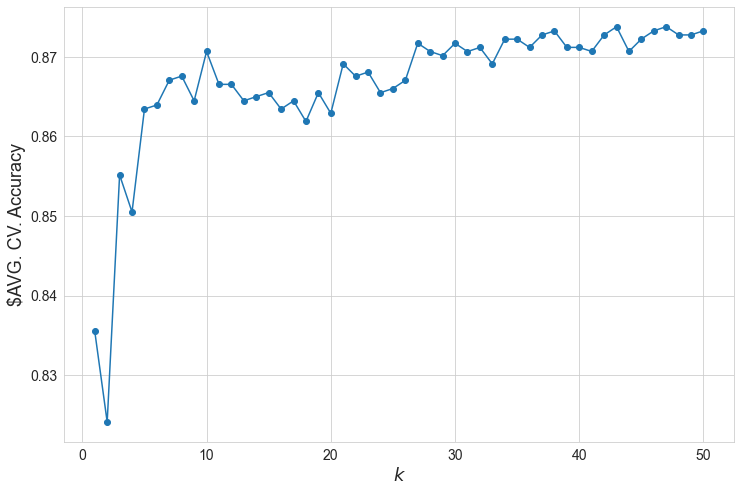

In [10]:
plt.figure(figsize=(12,8))

plt.plot(ks,
            np.mean(accs, axis=0), 
            '-o')

plt.xlabel("$k$", fontsize=18)
plt.ylabel("$AVG. CV. Accuracy", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)